In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
sales_data= pd.read_csv('files/supermarket_sales1.csv')
sales_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.7490,918.7290,12/30/2023,14:43,Ewallet,874.98,4.761905,43.7490,6.0
1,286-01-5402,A,Yangon,Normal,Female,Sports and travel,40.23,7,14.0805,295.6905,12/30/2023,13:22,Cash,281.61,4.761905,14.0805,9.6
2,731-59-7531,B,Mandalay,Member,Male,Health and beauty,72.57,8,29.0280,609.5880,12/30/2023,17:58,Cash,580.56,4.761905,29.0280,4.6
3,676-39-6028,A,Yangon,Member,Female,Electronic accessories,64.44,5,16.1100,338.3100,12/30/2023,17:04,Cash,322.20,4.761905,16.1100,6.6
4,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.0080,609.1680,12/30/2023,19:26,Credit card,580.16,4.761905,29.0080,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.4080,113.5680,1/1/2024,20:26,Ewallet,108.16,4.761905,5.4080,6.9
996,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.1100,779.3100,1/1/2024,14:42,Credit card,742.20,4.761905,37.1100,4.3
997,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.7660,184.0860,1/1/2024,11:40,Ewallet,175.32,4.761905,8.7660,5.0
998,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.4480,177.4080,1/1/2024,19:31,Cash,168.96,4.761905,8.4480,6.3


In [3]:
sales_data.drop(columns=['Date','Invoice ID','Branch','Payment','Time'],inplace=True)

In [4]:
sales_data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [5]:
sales_data.City.unique()

array(['Mandalay', 'Yangon', 'Naypyitaw'], dtype=object)

In [6]:
sales_data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
sales_data['Product line'].unique()

array(['Health and beauty', 'Sports and travel', 'Electronic accessories',
       'Food and beverages', 'Fashion accessories', 'Home and lifestyle'],
      dtype=object)

In [8]:
encoder_dict = {}
categorical_columns = ['City', 'Customer type', 'Gender', 'Product line']

for col in categorical_columns:
    encoder = LabelEncoder()
    sales_data[col] = encoder.fit_transform(sales_data[col])  # Fit & transform data
    encoder_dict[col] = encoder  # Store encoder in dictionary

# Save encoders
import os
os.makedirs("files", exist_ok=True)  # Ensure directory exists
with open("files/Sales_prediction_Encoder.pkl", "wb") as f:
    pickle.dump(encoder_dict, f)

print("Encoders applied & saved successfully!")

Encoders applied & saved successfully!


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     1000 non-null   int64  
 1   Customer type            1000 non-null   int64  
 2   Gender                   1000 non-null   int64  
 3   Product line             1000 non-null   int64  
 4   Unit price               1000 non-null   float64
 5   Quantity                 1000 non-null   int64  
 6   Tax 5%                   1000 non-null   float64
 7   Total                    1000 non-null   float64
 8   cogs                     1000 non-null   float64
 9   gross margin percentage  1000 non-null   float64
 10  gross income             1000 non-null   float64
 11  Rating                   1000 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 93.9 KB


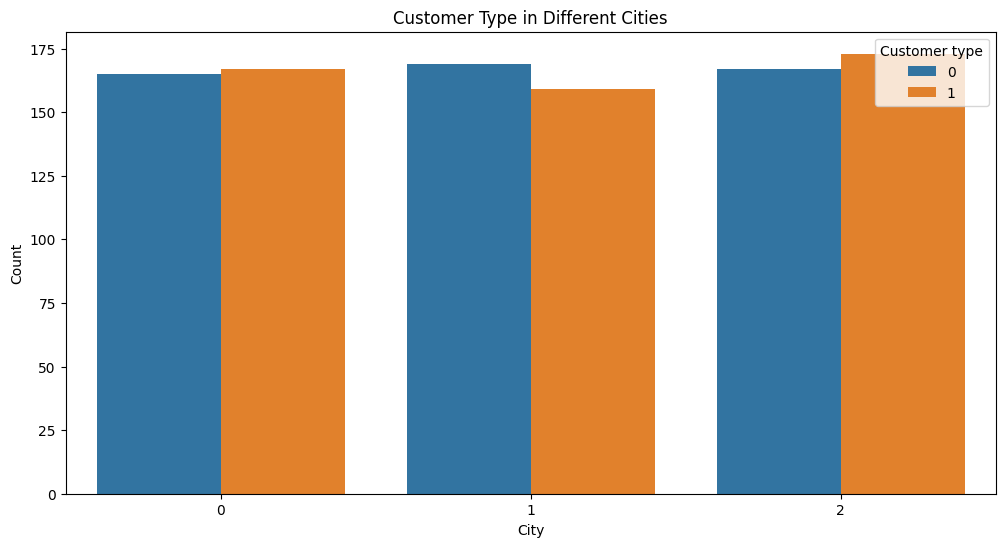

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='City', hue='Customer type', data=sales_data)
plt.title('Customer Type in Different Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

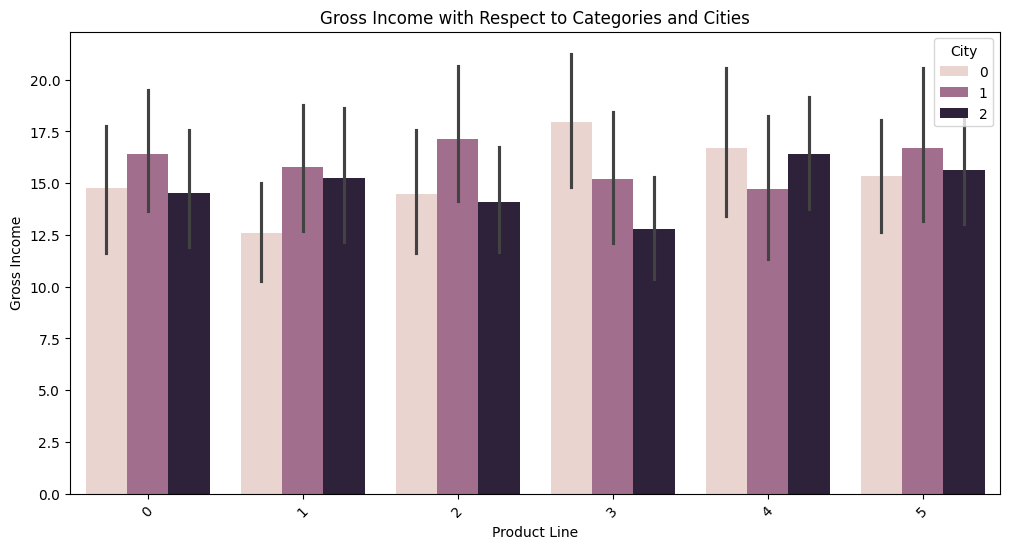

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='gross income', hue='City', data=sales_data)
plt.title('Gross Income with Respect to Categories and Cities')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper right')
plt.show()

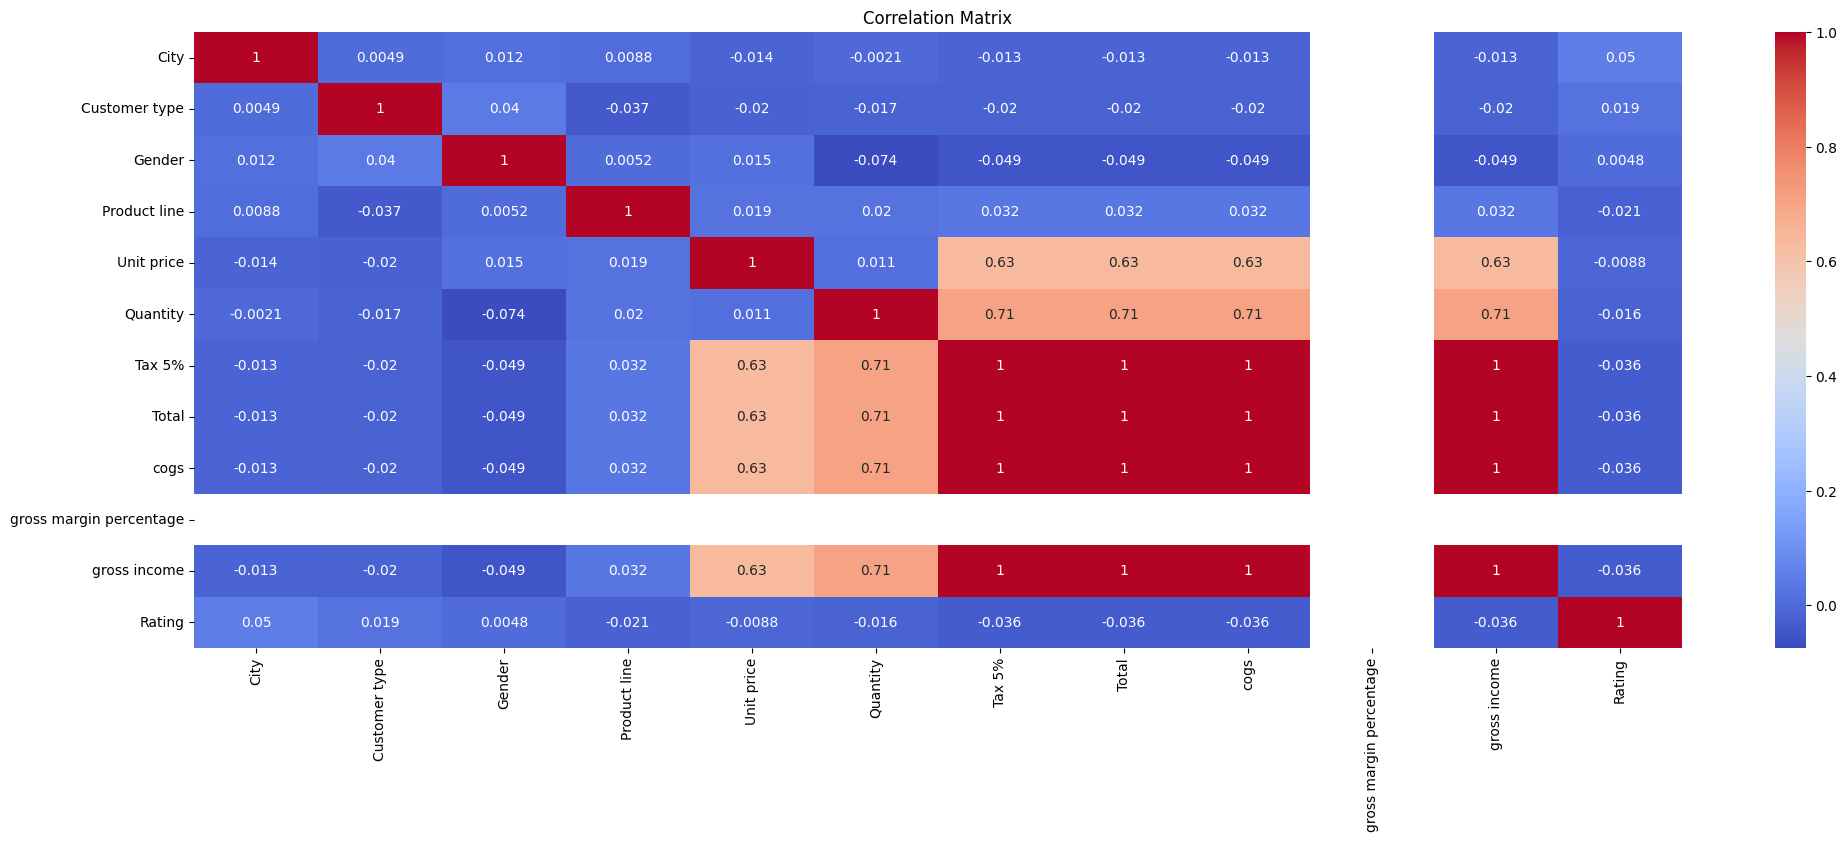

In [12]:
plt.figure(figsize=[24,8])
sns.heatmap(sales_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

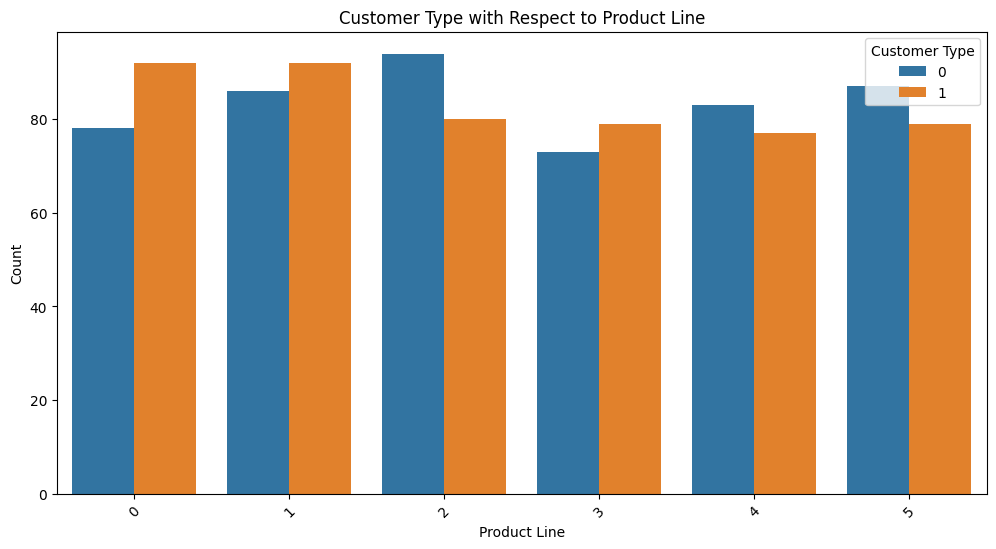

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product line', hue='Customer type', data=sales_data)
plt.title('Customer Type with Respect to Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Type', loc='upper right')
plt.show()

In [14]:
sales_data.describe()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,1.008000,0.499000,0.499000,2.452000,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,0.820127,0.500249,0.500249,1.715412,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,1.000000,0.000000,0.000000,2.000000,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [15]:
sales_data.isnull().sum()

City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [16]:
sales_data['Total']

0      918.7290
1      295.6905
2      609.5880
3      338.3100
4      609.1680
         ...   
995    113.5680
996    779.3100
997    184.0860
998    177.4080
999    888.6150
Name: Total, Length: 1000, dtype: float64

## Data pre-processing

In [17]:
sales_data.drop(columns=['Tax 5%','cogs','gross margin percentage','gross income'],inplace=True)
sales_data


,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Rating
0,0,0,1,3,97.22,9,918.7290,6.0
1,2,1,0,5,40.23,7,295.6905,9.6
2,0,0,1,3,72.57,8,609.5880,4.6
3,2,0,0,0,64.44,5,338.3100,6.6
4,1,0,0,2,72.52,8,609.1680,4.0
...,...,...,...,...,...,...,...,...
995,2,0,0,5,27.04,4,113.5680,6.9
996,2,0,0,0,74.22,10,779.3100,4.3
997,1,0,0,5,29.22,6,184.0860,5.0
998,0,1,1,2,21.12,8,177.4080,6.3


In [18]:
inscaler = StandardScaler()
scaled_X = inscaler.fit_transform(sales_data.drop(columns=['Total']))

outscaler = StandardScaler()
scaled_y = outscaler.fit_transform(sales_data[['Total']])

## Data sampling

In [19]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,scaled_y,test_size=0.2)

## Model Training

In [20]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
rf_pred = model.predict(X_test)

In [22]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Mean squared error:",rf_mse)
print("R squared score:",rf_r2)

Mean squared error: 0.001355141872029782
R squared score: 0.9986145838555491


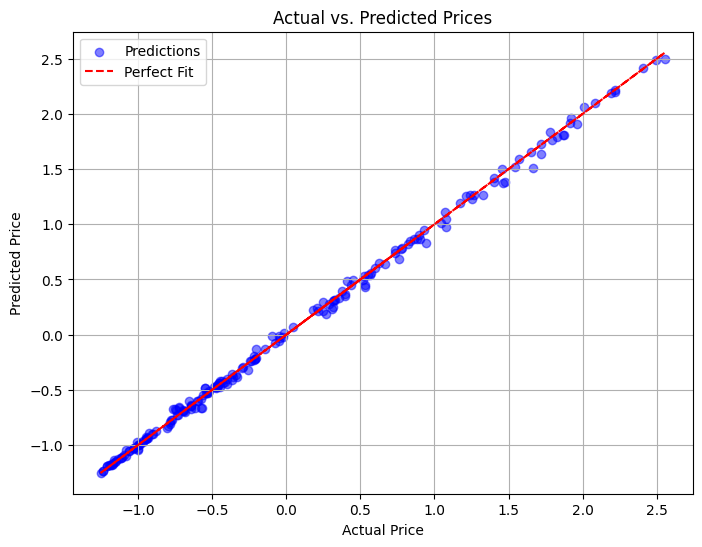

In [23]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Fit")  # Ideal Line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.grid()
plt.show()


In [24]:
pickle.dump(model,open("files/sales_prediction_model.pkl",'wb'))
pickle.dump(inscaler,open("files/sales_prediction_inScaler.pkl",'wb'))
pickle.dump(outscaler,open("files/sales_prediction_outScaler.pkl",'wb'))

## Inference

In [25]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

def sales_prediction(City, Customer_type, Gender, Product_line, Unit_price, Quantity, Rating):
    # Load trained models and encoders
    model = pickle.load(open("files/sales_prediction_model.pkl", 'rb'))
    encoder_dict = pickle.load(open("files/Sales_prediction_Encoder.pkl", 'rb'))
    inscaler = pickle.load(open("files/sales_prediction_inScaler.pkl", 'rb'))
    outscaler = pickle.load(open("files/sales_prediction_outScaler.pkl", 'rb'))

    # Encode categorical variables
    encoded_inputs = [
        encoder_dict["City"].transform([City])[0],
        encoder_dict["Customer type"].transform([Customer_type])[0],
        encoder_dict["Gender"].transform([Gender])[0],
        encoder_dict["Product line"].transform([Product_line])[0]
    ]

    # Convert input into a NumPy array
    input_data = np.array([[*encoded_inputs, Unit_price, Quantity, Rating]])

    # Scale input data
    scaled_input = inscaler.transform(input_data)

    # Predict sales
    prediction = model.predict(scaled_input)

    # Inverse transform the prediction
    inverse_scaled_pred = outscaler.inverse_transform(prediction.reshape(-1, 1))

    # Extract predicted sales amount
    sales_price = float(inverse_scaled_pred[0][0])  # Convert to float for safety

    # Create a dictionary for attributes
    attributes = {
        "City (Encoded)": encoded_inputs[0],
        "Customer Type (Encoded)": encoded_inputs[1],
        "Gender (Encoded)": encoded_inputs[2],
        "Product Line (Encoded)": encoded_inputs[3],
        "Unit Price": Unit_price,
        "Quantity": Quantity,
        "Rating": Rating,
        "Predicted Sales": sales_price
    }

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(attributes.keys()), y=list(attributes.values()), palette="viridis")

    # Annotate values on bars
    for index, value in enumerate(attributes.values()):
        plt.text(index, value + 0.05 * max(attributes.values()), f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')

    # Add title and labels
    plt.xticks(rotation=30, ha='right', fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.title("Sales Prediction Analysis", fontsize=14, fontweight='bold')

    # Save the graph
    graph_path = "files/sales_prediction_result.png"
    plt.savefig(graph_path, bbox_inches="tight")
    plt.close()

    return f"Predicted Sales: {sales_price:.2f} Units", graph_path  

# Example usage
predicted_sales, graph = sales_prediction('Mandalay','Member','Male','Health and beauty', 500, 2, 4.5)
print(predicted_sales)
print(f"Graph saved at: {graph}")


Predicted Sales: 206.91 Units
Graph saved at: files/sales_prediction_result.png


In [26]:
predicted_sales, graph = sales_prediction('Mandalay','Member','Female','Health and beauty', 1500, 12, 5)
print(predicted_sales)
print(f"Graph saved at: {graph}")

Predicted Sales: 1035.71 Units
Graph saved at: files/sales_prediction_result.png
